In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the data

In [3]:
console = pd.read_csv(r"data\best_selling_consoles.csv")
games = pd.read_csv(r"data\video_games_sales.csv")

Checking games

In [4]:
games.head(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
games.tail(5)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
games.columns


Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

Cleaning games column names

In [7]:
games.columns = games.columns.str.title() .str.strip() .str.replace('_', ' ')

Dropping unneeded games columns

In [8]:
games_clean = games.drop('Rank', axis=1)
games_clean.head(5)

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Checking console

In [9]:
console.head(10)

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN
5,PlayStation 4,Home,Sony,2013,0,117.20,NaN
6,PlayStation,Home,Sony,1994,2006,102.49,NaN
7,Wii,Home,Nintendo,2006,2013,101.63,NaN
8,PlayStation 3,Home,Sony,2006,2017,87.40,Final sales are greater than 87.4 million
9,Xbox 360,Home,Microsoft,2005,2016,84.00,Final sales are greater than 84 million


Checking console column names

In [10]:
console.columns

Index(['Console Name', 'Type', 'Company', 'Released Year',
       'Discontinuation Year', 'Units sold (million)', 'Remarks'],
      dtype='object')

Dropping not needed columns

In [11]:
console_clean = console.drop('Remarks', axis=1)

Renaming 'Console name' to platform premerge

In [12]:
console_clean = console_clean.rename(columns={'Console Name': 'Platform'})
console_clean

,Platform,Type,Company,Released Year,Discontinuation Year,Units sold (million)
0,PlayStation 2,Home,Sony,2000,2013,155.00
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55
3,Game Boy,Handheld,Nintendo,1989,2003,64.42
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06
5,PlayStation 4,Home,Sony,2013,0,117.20
6,PlayStation,Home,Sony,1994,2006,102.49
7,Wii,Home,Nintendo,2006,2013,101.63
8,PlayStation 3,Home,Sony,2006,2017,87.40
9,Xbox 360,Home,Microsoft,2005,2016,84.00


Checking how each dataframe list different consoles in the platform columns

In [13]:
console_clean['Platform'].unique()

array(['PlayStation 2', 'Nintendo DS', 'Nintendo Switch', 'Game Boy',
       'Game Boy Color', 'PlayStation 4', 'PlayStation', 'Wii',
       'PlayStation 3', 'Xbox 360', 'Game Boy Advance',
       'PlayStation Portable', 'Nintendo 3DS', 'NES/Famicom', 'Xbox One',
       'SNES/Super Famicom', 'Game & Watch', 'Nintendo 64',
       'Sega Genesis/Mega Drive', 'PlayStation 5', 'Atari 2600', 'Xbox',
       'GameCube', 'Xbox Series X/S', 'Wii U', 'PlayStation Vita',
       'Sega Master System', 'Sega Game Gear', 'PC Engine/TurboGrafx-16',
       'Sega Saturn', 'Dreamcast', 'Master System(Brazilian variants)',
       'Dendy(Famiclone)', 'Super NES Classic Edition',
       'Famicom Disk System', 'NES Classic Edition', 'WonderSwan',
       'Sega Pico', 'Color TV-Game', 'Intellivision',
       'Mega Drive(Brazilian variants)', 'N-Gage', 'Sega CD',
       'ColecoVision', 'Magnavox Odyssey', 'PC Engine CD-ROM',
       'Atari 7800', 'Atari Lynx', 'Philips CD-i', 'Telstar',
       'Atari 5200'], dtyp

In [14]:
games_clean['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Matching and verifying the platforms in the console dataframe so it can merge with console dataframe

In [15]:
platform_matching ={
    'NES': 'NES/Famicom',
    'GB': 'Game Boy',
    'DS': 'Nintendo DS',
    'X360': 'Xbox 360',
    'PS3': 'PlayStation 3',
    'PS2': 'PlayStation 2',
    'SNES': 'SNES/Super Famicom',
    'GBA': 'Game Boy Advance',
    '3DS': 'Nintendo 3DS',
    'PS4': 'PlayStation 4',
    'N64': 'Nintendo 64',
    'PS': 'PlayStation',
    'XB': 'Xbox',
    '2600': 'Atari 2600',
    'PSP': 'PlayStation Portable',
    'XOne': 'Xbox One',
    'GC':'GameCube',
    'WiiU':'Wii U',
    'GEN':'Sega Genesis/Mega Drive',
    'DC': 'DreamCast',
    'PSV': 'PlayStation 5',
    'SAT': 'Sega Saturn',
    'SCD': 'Sega CD',
    'WS':'Wonderswan',
    'TG16': 'PC Engine/TurboGrafx-16',
    'GG':'Sega Game Gear'}


games_clean['Platform'] = games_clean['Platform'].replace(platform_matching)
games_clean

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES/Famicom,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,Game Boy Advance,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GameCube,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PlayStation 2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,Nintendo DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Merging the dataframes on the Platform column

In [16]:
games_console_mergered = pd.merge(games_clean, console_clean, on='Platform', how='inner')
games_console_mergered.head(10)

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales,Type,Company,Released Year,Discontinuation Year,Units sold (million)
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home,Nintendo,2006,2013,101.63
1,Super Mario Bros.,NES/Famicom,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home,Nintendo,1983,2003,61.91
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Home,Nintendo,2006,2013,101.63
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home,Nintendo,2006,2013,101.63
4,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Handheld,Nintendo,1989,2003,64.42
5,Tetris,Game Boy,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Handheld,Nintendo,1989,2003,64.42
6,New Super Mario Bros.,Nintendo DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Handheld,Nintendo,2004,2013,154.02
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Home,Nintendo,2006,2013,101.63
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Home,Nintendo,2006,2013,101.63
9,Duck Hunt,NES/Famicom,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Home,Nintendo,1983,2003,61.91


Renaming columns in the merged dataframe

In [17]:
cols_rename = {'Type': 'Console Type',
    'Company':'Console Manufacturer',
    'Released Year': 'Console Released',
    'Discontinuation Year': 'Console Discontinued',
    'Units sold (million)': 'Consoles Sold'}

merged_col_rename = games_console_mergered.rename(columns=(cols_rename))
merged_col_rename.head(5)

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales,Console Type,Console Manufacturer,Console Released,Console Discontinued,Consoles Sold
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home,Nintendo,2006,2013,101.63
1,Super Mario Bros.,NES/Famicom,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home,Nintendo,1983,2003,61.91
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Home,Nintendo,2006,2013,101.63
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home,Nintendo,2006,2013,101.63
4,Pokemon Red/Pokemon Blue,Game Boy,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Handheld,Nintendo,1989,2003,64.42


Checking for nulls

In [18]:
merged_col_rename.isna().sum()

Name                      0
Platform                  0
Year                    254
Genre                     0
Publisher                52
Na Sales                  0
Eu Sales                  0
Jp Sales                  0
Other Sales               0
Global Sales              0
Console Type              0
Console Manufacturer      0
Console Released          0
Console Discontinued      0
Consoles Sold             0
dtype: int64

Filling the nulls

In [19]:
merged_col_rename['Year'] = merged_col_rename['Year'].fillna(0).astype(int)
merged_col_rename['Publisher'] = merged_col_rename['Publisher'].fillna('Unknown')

In [20]:
genre_pivot = pd.pivot_table(merged_col_rename, index='Genre', columns='Platform', values='Global Sales', aggfunc='sum')



Text(120.72222222222221, 0.5, 'Genre')

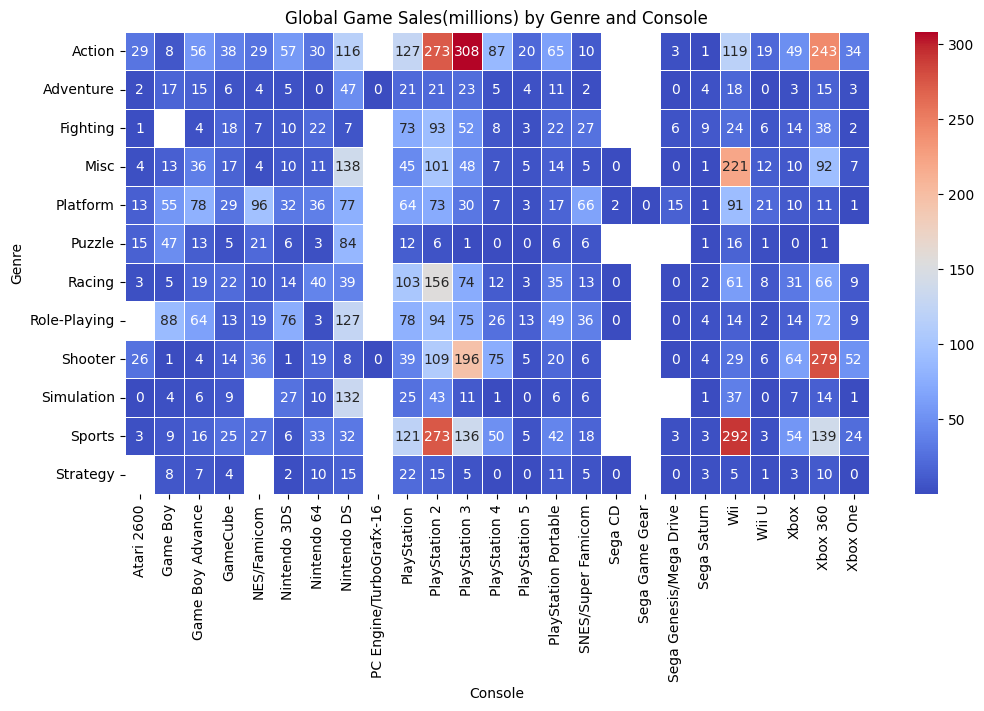

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(genre_pivot, annot=True, cmap='coolwarm', fmt='.0f', linewidths=0.5)
plt.title("Global Game Sales(millions) by Genre and Console")
plt.xlabel('Console')
plt.ylabel('Genre')


In [22]:
games_yr_console_released = merged_col_rename[merged_col_rename['Year'] == merged_col_rename["Console Released"]]
games_yr_console_released.head(5)

,Name,Platform,Year,Genre,Publisher,Na Sales,Eu Sales,Jp Sales,Other Sales,Global Sales,Console Type,Console Manufacturer,Console Released,Console Discontinued,Consoles Sold
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home,Nintendo,2006,2013,101.63
5,Tetris,Game Boy,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Handheld,Nintendo,1989,2003,64.42
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Home,Nintendo,2006,2013,101.63
18,Super Mario World,SNES/Super Famicom,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,Home,Nintendo,1990,2003,49.10
21,Super Mario Land,Game Boy,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,Handheld,Nintendo,1989,2003,64.42


In [30]:
launch_year_game_sales = games_yr_console_released.groupby('Platform')['Global Sales'].sum().reset_index()
launch_year_game_sales

,Platform,Global Sales
0,Game Boy,64.98
1,Game Boy Advance,61.62
2,GameCube,26.30
3,NES/Famicom,10.96
4,Nintendo 3DS,62.53
5,Nintendo 64,34.11
6,Nintendo DS,17.46
7,PlayStation,6.02
8,PlayStation 2,39.11
9,PlayStation 3,21.07


Text(0, 0.5, 'Launch Year Game Sales(Millions)')

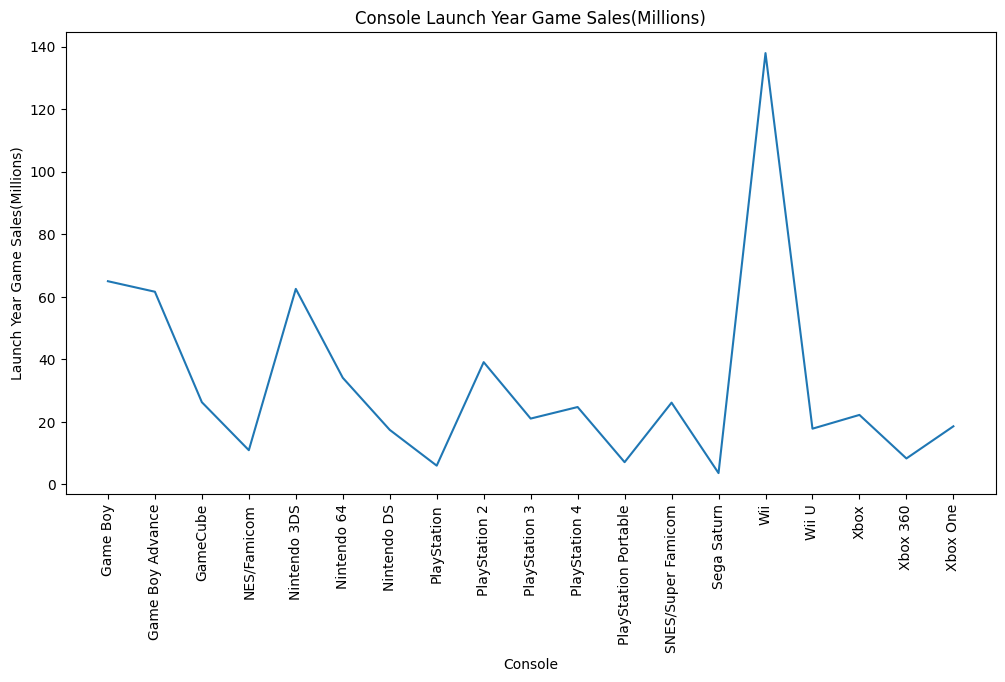

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(launch_year_game_sales['Platform'], launch_year_game_sales['Global Sales'])
plt.title('Console Launch Year Game Sales(Millions)')
plt.xlabel('Console')
plt.xticks(rotation=90)
plt.ylabel('Launch Year Game Sales(Millions)')



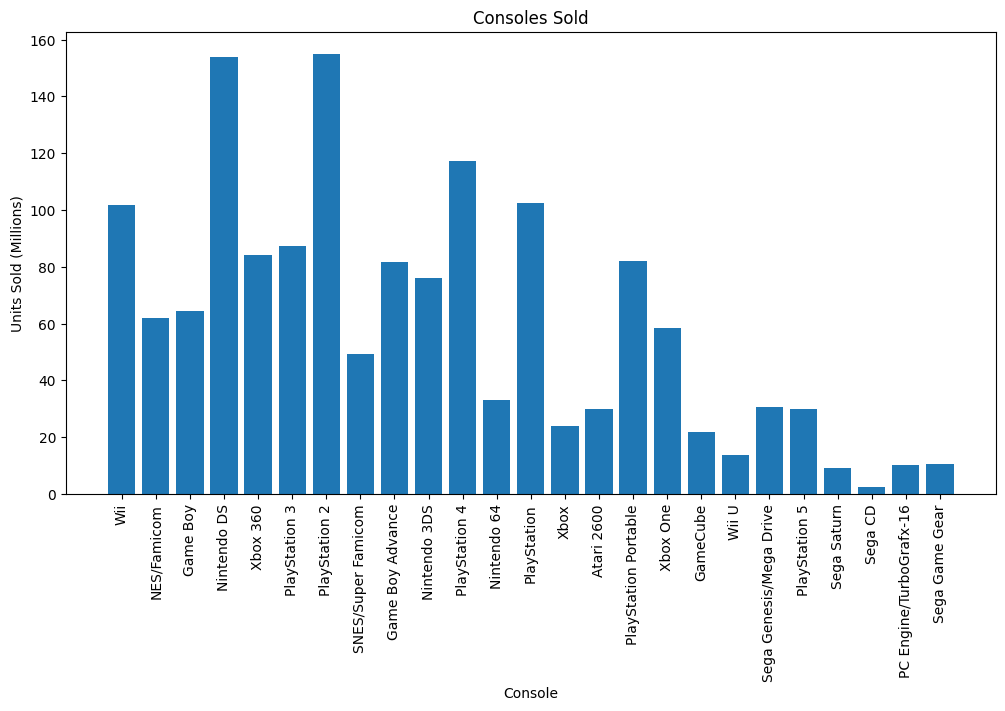

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(merged_col_rename['Platform'], merged_col_rename['Consoles Sold'])
plt.title('Consoles Sold')
plt.xlabel('Console')
plt.xticks(rotation=90)
plt.ylabel('Units Sold (Millions)')
plt.show()

In [26]:
consoles_scatter = merged_col_rename.groupby('Platform').agg({'Global Sales': 'sum', 'Consoles Sold': 'first' })

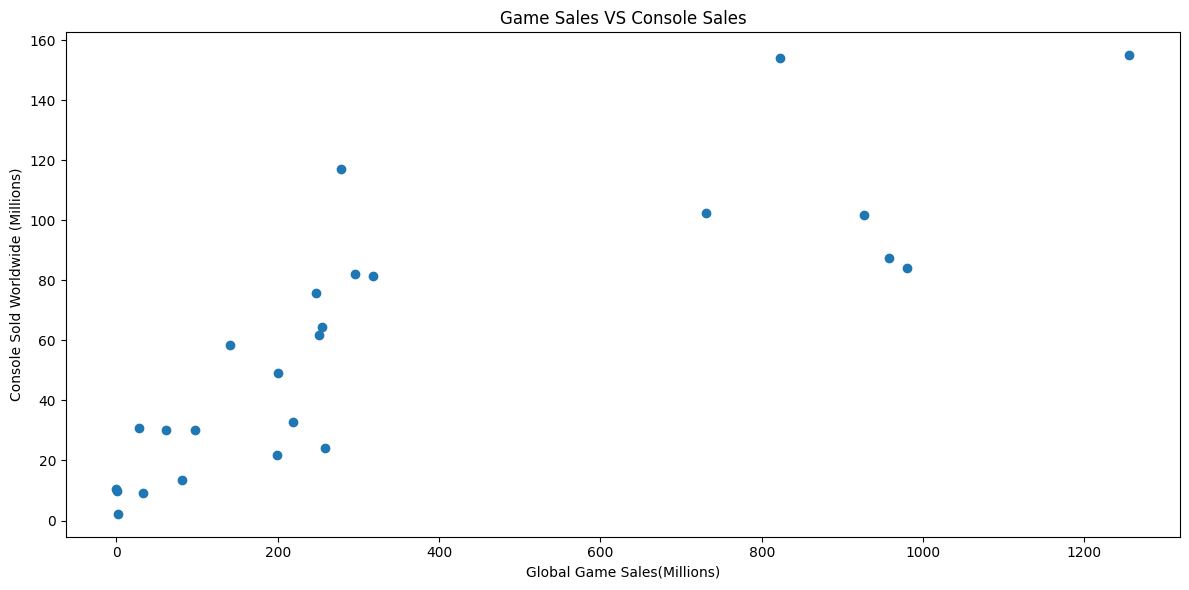

In [27]:
plt.figure(figsize= (12, 6))
plt.scatter(consoles_scatter['Global Sales'], consoles_scatter['Consoles Sold'])
plt.title('Game Sales VS Console Sales' )
plt.xlabel('Global Game Sales(Millions)')
plt.ylabel('Console Sold Worldwide (Millions)')
plt.tight_layout()